In [1]:
from acorl.env_wrapper.adaption_fn import ConditionalAdaptionEnvWrapper
from acorl.acrl_algos.alpha_projection.mapping import alpha_projection_interface_fn
from acorl.envs.constraints.seeker import SeekerInputSetPolytopeCalculator
from rl_competition.competition.environment import create_exploration_seeker  # for env_config

from plot_utils import plot_seeker_obs, decode_obs

import numpy as np

In [2]:
def action_towards_closest_obstacle(agent, obstacles, *, normalize=True):
    """
    Compute an action vector pointing from the agent directly toward
    the closest obstacle center.

    Parameters
    ----------
    agent : array-like, shape (dim,)
        Agent position.
    obstacles : array-like, shape (N, dim+1)
        Obstacle positions + radius. Only positions are used.
    normalize : bool
        If True, return a unit direction vector.
        If False, return the raw displacement vector.

    Returns
    -------
    action : np.ndarray, shape (dim,)
        Action vector pointing toward the closest obstacle.
    idx : int
        Index of the closest obstacle.
    dist : float
        Distance to the closest obstacle center.
    """
    agent = np.asarray(agent)
    obstacles = np.asarray(obstacles)

    centers = obstacles[:, :-1]  # drop radius
    diffs = centers - agent      # vectors agent -> obstacle
    dists = np.linalg.norm(diffs, axis=1)

    idx = np.argmin(dists)
    direction = diffs[idx]
    dist = dists[idx]

    if normalize:
        if dist > 0:
            direction = direction / dist
        else:
            direction = np.zeros_like(direction)

    return direction, idx, dist

In [3]:
env_raw, env_config = create_exploration_seeker()
#env_raw = env_raw.unwrapped

constraint_calculator = SeekerInputSetPolytopeCalculator(env_config=env_config)
env_real = ConditionalAdaptionEnvWrapper(env_raw, 
                                        constraint_calculator.compute_relevant_input_set,
                                        constraint_calculator.compute_fail_safe_input,
                                        constraint_calculator.get_set_representation(),
                                        alpha_projection_interface_fn)

In [4]:
env_real

<ConditionalAdaptionEnvWrapper<TimeLimit<OrderEnforcing<PassiveEnvChecker<SeekerExplorationEnv<acorl-envs/SeekerExplorationEnv>>>>>>

In [5]:
np.random.seed(42)
obs, info = env_real.reset(seed=42)

In [6]:
info

{'distance': 18.12150012724953,
 'boundary_size': 10,
 'require_fail_safe': False,
 'relevant_input_set': <acorl.convexsets.hpolytope.HPolytope at 0x24e3fc8ba10>,
 'fail_safe_input': array([None, None, None], dtype=object)}

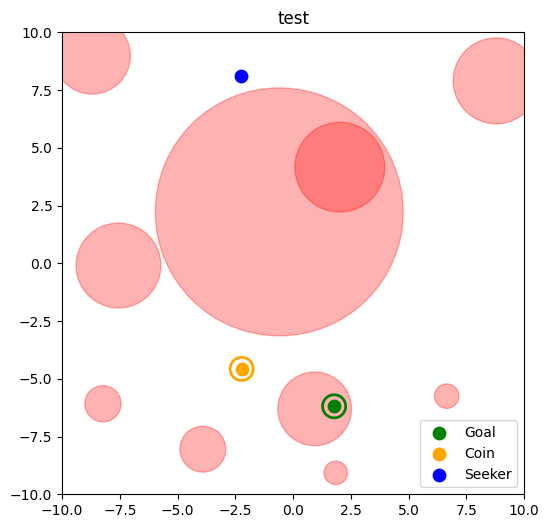

In [7]:
plot_seeker_obs(obs, info, num_obstacles=10, env=env_real, title="test")

In [8]:
agent, goal, obstacles, coin, dim = decode_obs(obs, num_obstacles=10)
direction, idx, dist = action_towards_closest_obstacle(agent, obstacles, normalize=False)
action = np.clip(direction, -1.0, 1.0)

In [9]:
action

array([ 1., -1., -1.])

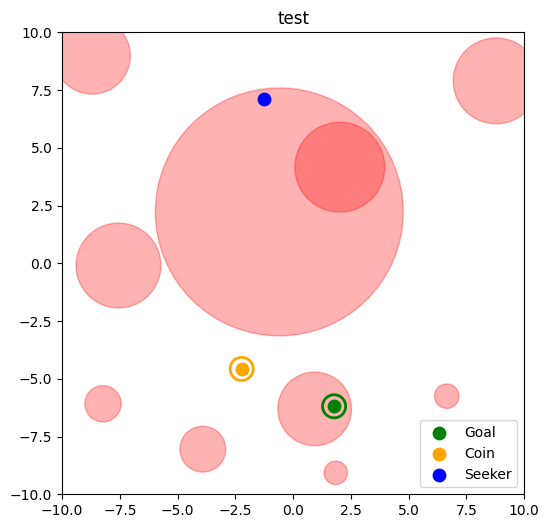

[ 1. -1. -1.]
{'distance': 16.552204764362358, 'boundary_size': 10, 'require_fail_safe': False, 'relevant_input_set': <acorl.convexsets.hpolytope.HPolytope object at 0x0000024EB9BC5110>, 'fail_safe_input': array([None, None, None], dtype=object), 'adapted_action': array([ 1., -1., -1.])}


In [10]:
obs, reward, terminated, truncated, info = env_real.step(action)
plot_seeker_obs(obs, info, num_obstacles=10, env=env_real, title="test")
print(action)
print(info)

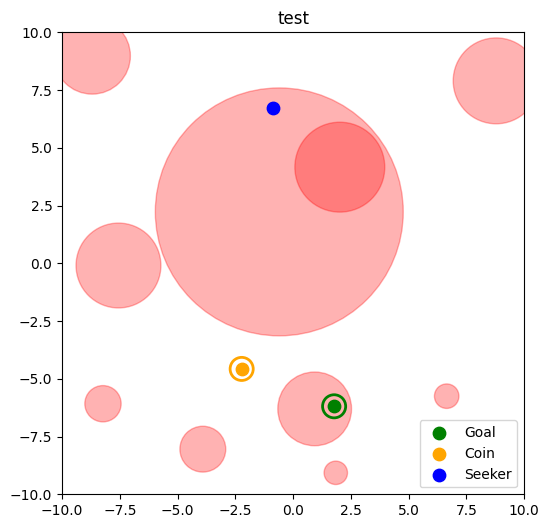

[ 1. -1. -1.]
{'distance': 15.980812858617302, 'boundary_size': 10, 'require_fail_safe': False, 'relevant_input_set': <acorl.convexsets.hpolytope.HPolytope object at 0x0000024EBBF17950>, 'fail_safe_input': array([None, None, None], dtype=object), 'adapted_action': array([ 0.36953019, -0.36953019, -0.36953019])}


In [11]:
obs, reward, terminated, truncated, info = env_real.step(action)
plot_seeker_obs(obs, info, num_obstacles=10, env=env_real, title="test")
print(action)
print(info)

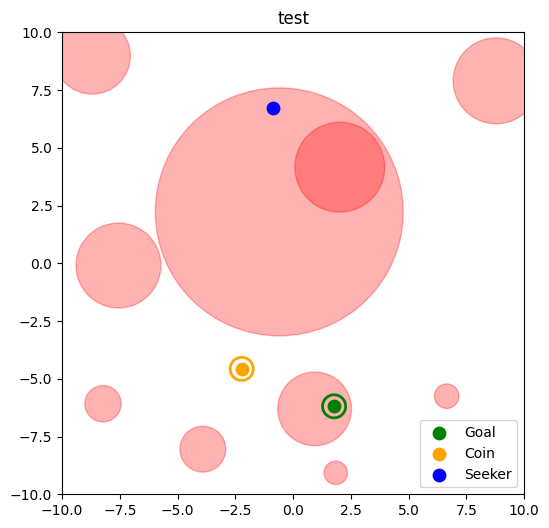

[ 1. -1. -1.]
{'distance': 15.97017041522545, 'boundary_size': 10, 'require_fail_safe': False, 'relevant_input_set': <acorl.convexsets.hpolytope.HPolytope object at 0x0000024EBBE815D0>, 'fail_safe_input': array([None, None, None], dtype=object), 'adapted_action': array([ 0.00691477, -0.00691477, -0.00691477])}


In [12]:
obs, reward, terminated, truncated, info = env_real.step(action)
plot_seeker_obs(obs, info, num_obstacles=10, env=env_real, title="test")
print(action)
print(info)

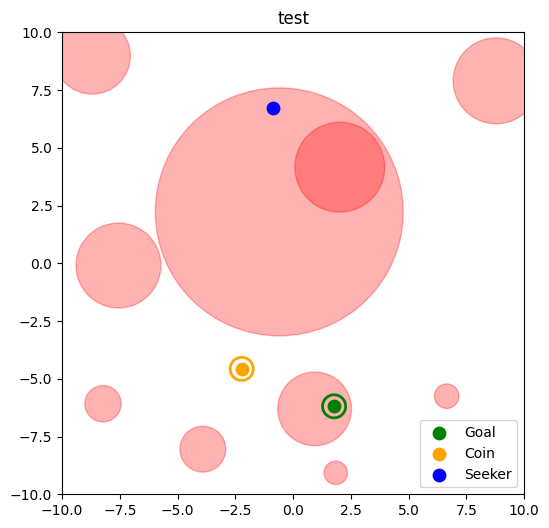

[ 1. -1. -1.]
{'distance': 15.970165848898114, 'boundary_size': 10, 'require_fail_safe': False, 'relevant_input_set': <acorl.convexsets.hpolytope.HPolytope object at 0x0000024EBBF289D0>, 'fail_safe_input': array([None, None, None], dtype=object), 'adapted_action': array([ 2.96716917e-06, -2.96716917e-06, -2.96716917e-06])}


In [13]:
obs, reward, terminated, truncated, info = env_real.step(action)
plot_seeker_obs(obs, info, num_obstacles=10, env=env_real, title="test")
print(action)
print(info)